In [78]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style


In [79]:
style.use('fivethirtyeight')

In [80]:
player_data_dir = '../Basketball Reference Stat Scraper/player_stats'

In [81]:
player = pd.read_csv(os.path.join(player_data_dir,f'{2023}_player_stats.csv'),index_col=0)
player.Player = player.Player.str.strip('*')
player = player.fillna(0)



In [83]:
Tm_list = []
VORP_list = []
BPM_list = []
WS_list = []
has_superstar = []

for i in ['Nikola Jokić','Joel Embiid', 'Giannis Antetokounmpo','Luka Dončić','Jayson Tatum','Shai Gilgeous-Alexander']:
        ind_player = player.loc[player.Player == i,:]
        tm = ind_player.Tm.values[0]
        
        Tm_list.append(tm)
        
        tm_without_superstar = player.loc[(player.Tm == tm),:].copy()
        
        tm_without_superstar.loc[:,'weight'] = tm_without_superstar.G * tm_without_superstar.MP
        
    

        VORP_list.append(np.average(tm_without_superstar['VORP'], weights=tm_without_superstar.weight))
        BPM_list.append(np.average(tm_without_superstar['BPM'], weights=tm_without_superstar.weight))
        WS_list.append(np.average(tm_without_superstar['WS'], weights=tm_without_superstar.weight))
        
        has_superstar.append('Has Superstar')
        

In [84]:



for i in ['Nikola Jokić','Joel Embiid', 'Giannis Antetokounmpo','Luka Dončić','Jayson Tatum','Shai Gilgeous-Alexander']:
        ind_player = player.loc[player.Player == i,:]
        tm = ind_player.Tm.values[0]
        
        
        
        tm_without_superstar = player.loc[(player.Tm == tm) & (player.Player != i),:].copy()
        
        tm_without_superstar.loc[:,'weight'] = tm_without_superstar.G * tm_without_superstar.MP
        
        Tm_list.append(tm)
    

        VORP_list.append(np.average(tm_without_superstar['VORP'], weights=tm_without_superstar.weight))
        BPM_list.append(np.average(tm_without_superstar['BPM'], weights=tm_without_superstar.weight))
        WS_list.append(np.average(tm_without_superstar['WS'], weights=tm_without_superstar.weight))
        has_superstar.append('No Superstar')

        

In [85]:
df = pd.DataFrame(columns=['Tm','VORP','BPM','WS','has_superstar'])
# df = df.set_index('Tm')

In [86]:
df['Tm'] = Tm_list
df['VORP'] = VORP_list
df['BPM'] = BPM_list
df['WS'] = WS_list
df['has_superstar'] = has_superstar




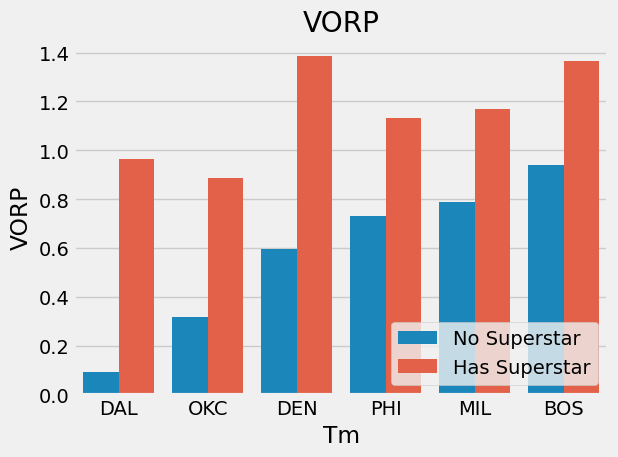

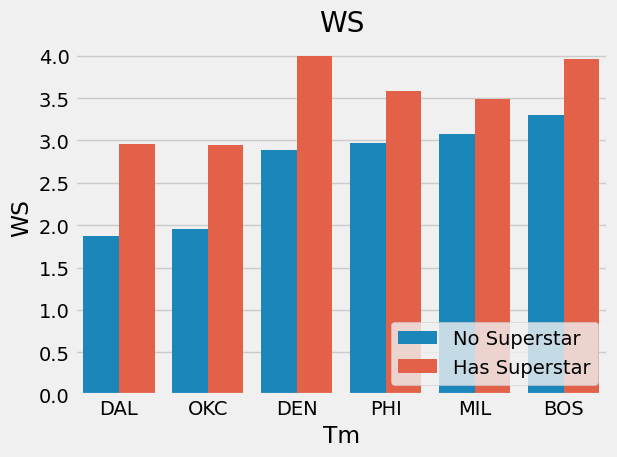

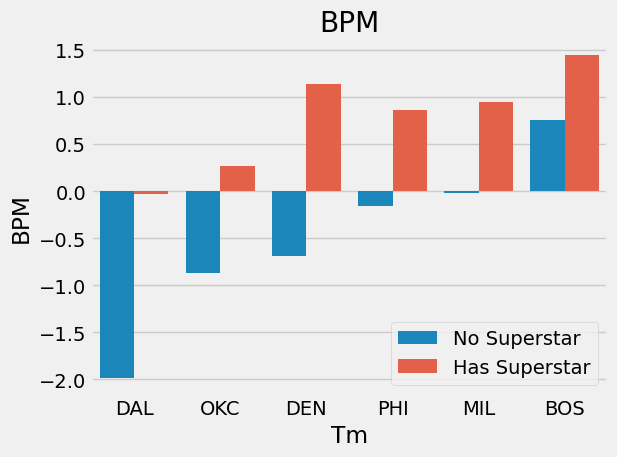

In [87]:

for val in ['VORP','WS','BPM']:
    sns.barplot(df.sort_values(val),x='Tm',y=val,hue='has_superstar')
    plt.title(val)
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.savefig(f'{val}_without_superstars.png',dpi=500)

    plt.show()


In [98]:
for i in df['Tm'].unique():
    df[df['Tm'] == i]
    

In [110]:
Tm_list = df['Tm'].unique()
VORP_list = []
BPM_list = []
WS_list = []


for tm in Tm_list:

    
    
    
    BPM_list.append(np.abs(df.loc[df['Tm'] == tm,'BPM']).sum())
    VORP_list.append(np.abs(df.loc[df['Tm'] == tm,'VORP']).sum())
    WS_list.append(np.abs(df.loc[df['Tm'] == tm,'WS']).sum())




In [111]:
abc = pd.DataFrame()

In [112]:
abc['Team'] = Tm_list
abc['VORP'] = VORP_list
abc['BPM'] = BPM_list
abc['WS'] = WS_list

In [113]:
abc

,Team,VORP,BPM,WS
0,DEN,1.980690,1.824368,6.882039
1,PHI,1.864376,1.021468,6.551557
2,MIL,1.956981,0.964837,6.563914
3,DAL,1.057463,2.024438,4.830229
4,BOS,2.307670,2.199275,7.268558
5,OKC,1.203246,1.134602,4.894588


,Team
0,DEN
1,PHI
2,MIL
3,DAL
4,BOS
5,OKC
